In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline = pd.read_csv("Passanger_booking_data.csv")

In [3]:
airline.shape

(50002, 14)

In [4]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [5]:
duplicates = airline.duplicated().sum()
print(f'The number of duplicate values: {duplicates}')

The number of duplicate values: 719


In [6]:
airline.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
cat_cols = airline.select_dtypes(include='object').columns.to_list()
cat_cols

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [8]:
for cols in cat_cols:
    print('*'*80)
    print(f"{cols}: {airline[cols].unique()}")

********************************************************************************
sales_channel: ['Internet' 'Mobile']
********************************************************************************
trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
********************************************************************************
flight_day: ['Tue' 'Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Fri']
********************************************************************************
route: ['AKLHGH' 'AKLDEL' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD'

In [9]:
airline.booking_origin.nunique()

104

In [10]:
airline.route.nunique()

799

In [11]:
duplicates

719

In [12]:
airline.drop_duplicates(inplace=True)

In [13]:
airline.reset_index(drop=True,inplace=True)

In [14]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [15]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49283 entries, 0 to 49282
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49283 non-null  int64  
 1   sales_channel          49283 non-null  object 
 2   trip_type              49283 non-null  object 
 3   purchase_lead          49283 non-null  int64  
 4   length_of_stay         49283 non-null  int64  
 5   flight_hour            49283 non-null  int64  
 6   flight_day             49283 non-null  object 
 7   route                  49283 non-null  object 
 8   booking_origin         49283 non-null  object 
 9   wants_extra_baggage    49283 non-null  int64  
 10  wants_preferred_seat   49283 non-null  int64  
 11  wants_in_flight_meals  49283 non-null  int64  
 12  flight_duration        49283 non-null  float64
 13  booking_complete       49283 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# EDA

In [16]:
pie_cols = ['sales_channel','wants_preferred_seat','wants_extra_baggage','wants_in_flight_meals',
           'booking_complete']

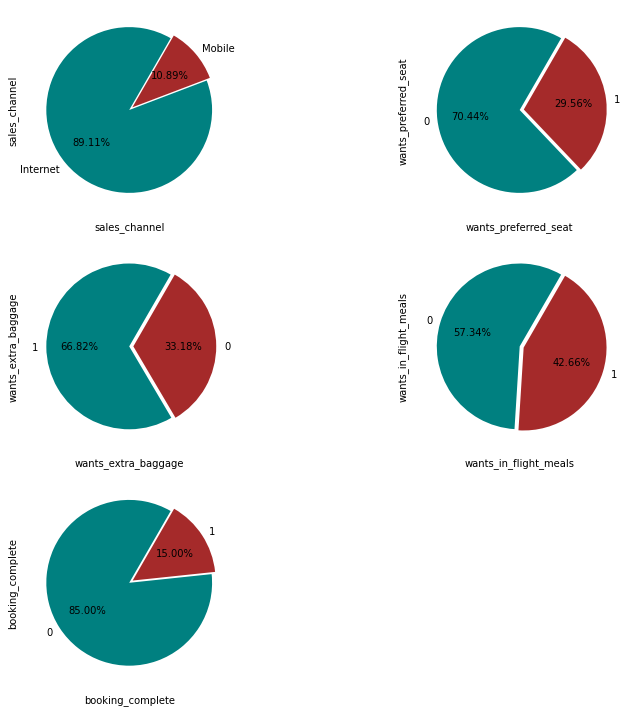

In [17]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axis = axis.flatten()

for i, var in enumerate(pie_cols):
    plt.sca(axis[i])  # Set the current axis to the one in the loop
    airline[var].value_counts().plot(kind = 'pie', autopct = '%.2f%%', 
                                    startangle=60 ,explode = [0, 0.05], colors=['teal','brown'])
    plt.xlabel(var)  
  

fig.delaxes(axis[-1])
fig.tight_layout()
plt.show()


In [18]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


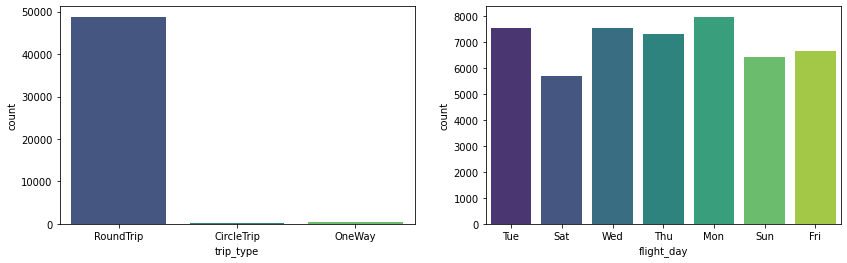

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(x='trip_type',data=airline,palette='viridis')

plt.subplot(122)
sns.countplot(x='flight_day',data=airline,palette='viridis');

In [20]:
num_cols = airline.select_dtypes(include=np.number).columns.to_list()
num_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

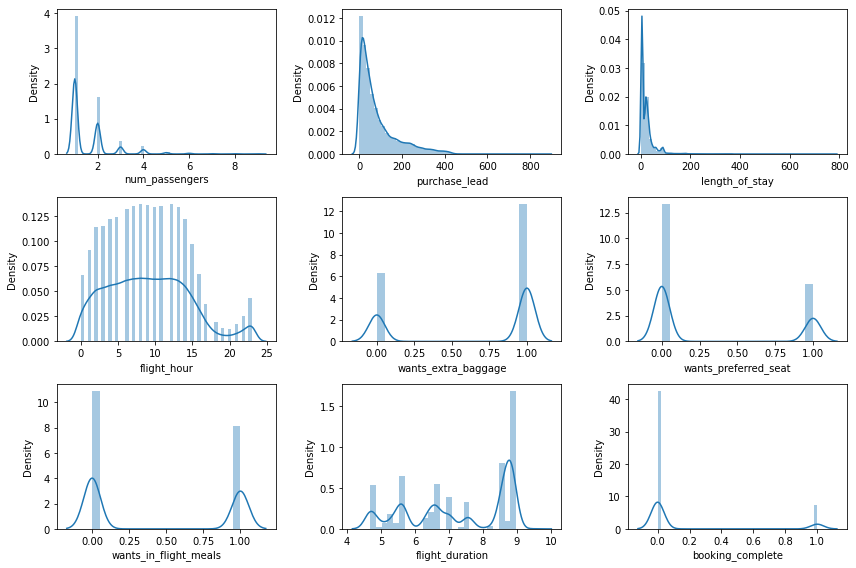

In [21]:
fig,axis = plt.subplots(nrows=3,ncols=3,figsize=(12,8))
axis = axis.flatten()
for i,var in enumerate(num_cols):
    sns.distplot(airline[var],ax=axis[i])
    axis[i].set_xlabel(var)
fig.tight_layout()  
plt.show()

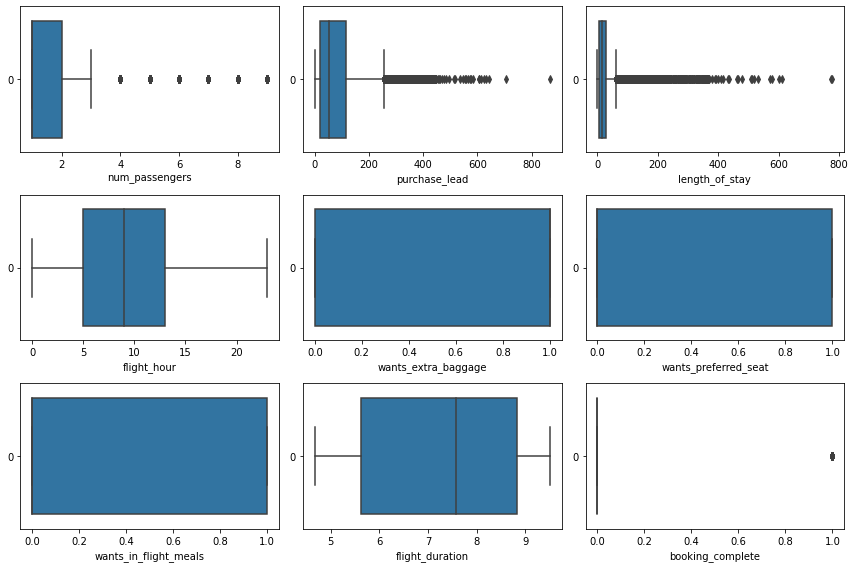

In [22]:
fig,axis = plt.subplots(nrows=3,ncols=3,figsize=(12,8))
axis = axis.flatten()
for i,var in enumerate(num_cols):
    sns.boxplot(airline[var],ax=axis[i],orient='h')
    axis[i].set_xlabel(var)
fig.tight_layout()  
plt.show()

In [23]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


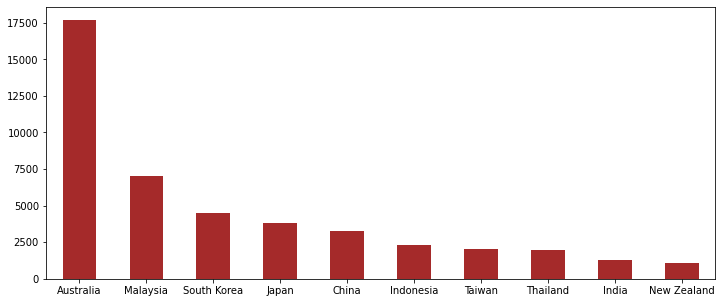

In [24]:
plt.figure(figsize=(12,5))
top_10_booking_origins = airline.booking_origin.value_counts().sort_values(ascending=False).head(10)
top_10_booking_origins.plot(kind='bar',color='brown')
plt.xticks(rotation='horizontal');

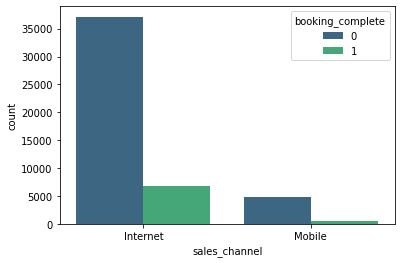

In [25]:
sns.countplot(x='sales_channel',hue='booking_complete',data=airline,palette='viridis')
plt.show()

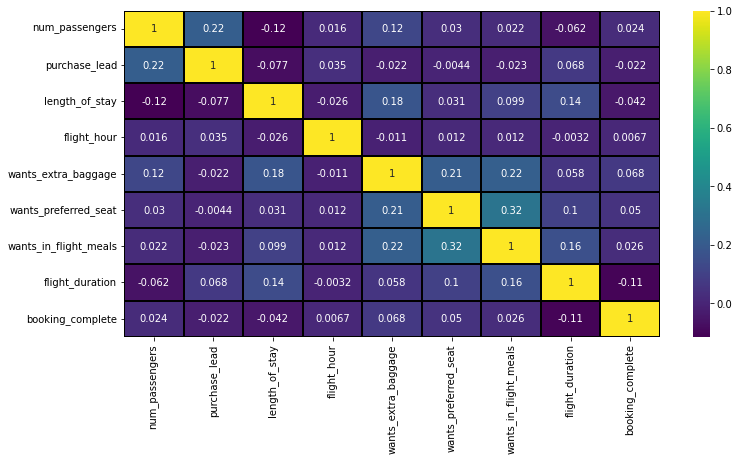

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(airline.corr(),annot=True,cmap='viridis',linecolor='black',lw=2);

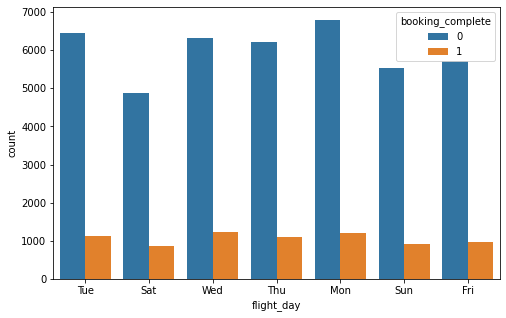

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x="flight_day",hue="booking_complete",data=airline)
plt.show()

In [28]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
airline['sales_channel'] = encoder.fit_transform(airline['sales_channel'])
airline['flight_day'] = encoder.fit_transform(airline['flight_day'])

In [30]:
airline.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,RoundTrip,21,12,6,5,AKLHGH,Australia,0,0,0,7.21,1
1,2,0,RoundTrip,262,19,7,2,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,0,RoundTrip,112,20,3,2,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,0,RoundTrip,243,22,17,6,AKLDEL,India,1,1,0,5.52,0
4,1,0,RoundTrip,96,31,4,2,AKLDEL,New Zealand,0,0,1,5.52,0


In [31]:
airline = airline.drop(columns=['route'])

In [32]:
X = airline.drop(columns="booking_complete")
y = airline["booking_complete"]

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape,X_test.shape

((39426, 12), (9857, 12))

In [35]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
24810,1,0,RoundTrip,8,21,10,4,Australia,1,0,1,8.58
15806,2,0,RoundTrip,380,42,11,4,Australia,0,0,0,8.83
41265,2,0,RoundTrip,20,5,23,1,Singapore,1,0,0,5.62
8541,1,0,RoundTrip,208,32,3,6,Australia,1,1,1,5.52
6006,1,0,RoundTrip,66,40,10,6,Australia,1,1,1,8.83


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ohe_encoding = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[2,7])
],remainder='passthrough')

algo = LogisticRegression()

In [37]:
pipe = Pipeline([
    ('step1',ohe_encoding),
    ('step3',algo)
])

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 7])])),
                ('step3', LogisticRegression())])

In [39]:
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [40]:
accuracy*100

85.61428426498935

In [41]:
cf = confusion_matrix(y_test,y_pred)

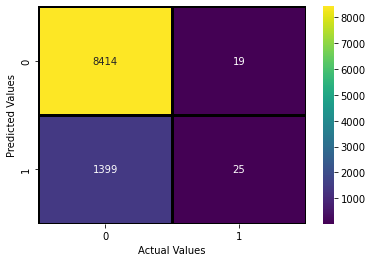

In [42]:
sns.heatmap(cf,annot=True,fmt=".0f",cmap='viridis',lw=3,linecolor='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [43]:
train_pred = pipe.predict(X_train)
acc_score_train = accuracy_score(y_train,train_pred)

In [44]:
acc_score_train*100

84.84248972759093

In [46]:
import pickle

In [47]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [48]:
pickled_model = pickle.load(open('pipe.pkl','rb'))